<a href="https://colab.research.google.com/github/ezhilsaka/nucamp/blob/main/sounds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip sounds.zip

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import glob
import os.path
import random

In [ ]:
soundfile_1 = wave.open('sounds/1_george_12.wav', 'r')
print(soundfile_1)

In [4]:
buf = soundfile_1.readframes(-1)

In [5]:
data_1 = np.frombuffer(buf, 'int16')

In [6]:
rate_1 = soundfile_1.getframerate()

In [7]:
xValues_1 = np.linspace(start=0,
                        stop=len(data_1)/rate_1,
                        num=len(data_1))

Text(0, 0.5, 'amp')

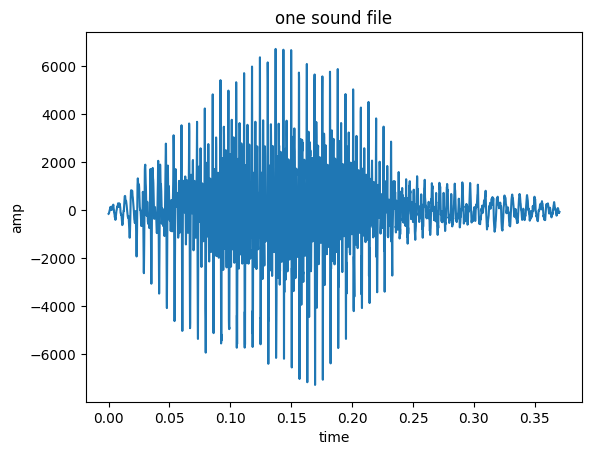

In [8]:
plt.plot(xValues_1, data_1)
plt.title('one sound file')
plt.xlabel('time')
plt.ylabel('amp')

(array([[4.41124760e-02, 1.82765873e-03, 6.06863615e-03, ...,
         3.11454016e-05, 1.93627128e-02, 3.94704794e-02],
        [8.39598574e-03, 4.81299134e-02, 2.50821953e-02, ...,
         9.86702867e-02, 1.34151053e-02, 1.55335935e-03],
        [1.23700922e-01, 9.21521092e-02, 1.77538855e-02, ...,
         1.78737806e-01, 1.16580505e-01, 6.08224388e-02],
        ...,
        [8.64454153e-03, 1.78962385e-02, 2.04928927e-02, ...,
         1.84235255e-03, 5.53635722e-03, 3.75997177e-03],
        [6.39183245e-03, 1.23072216e-02, 1.76293206e-02, ...,
         3.84516336e-04, 3.24941673e-03, 3.25727949e-03],
        [3.35287359e-05, 9.22793128e-03, 4.39162147e-03, ...,
         2.14995785e-03, 3.10231263e-03, 3.25115302e-03]]),
 array([   0.  ,   31.25,   62.5 ,   93.75,  125.  ,  156.25,  187.5 ,
         218.75,  250.  ,  281.25,  312.5 ,  343.75,  375.  ,  406.25,
         437.5 ,  468.75,  500.  ,  531.25,  562.5 ,  593.75,  625.  ,
         656.25,  687.5 ,  718.75,  750.  ,  781.25,

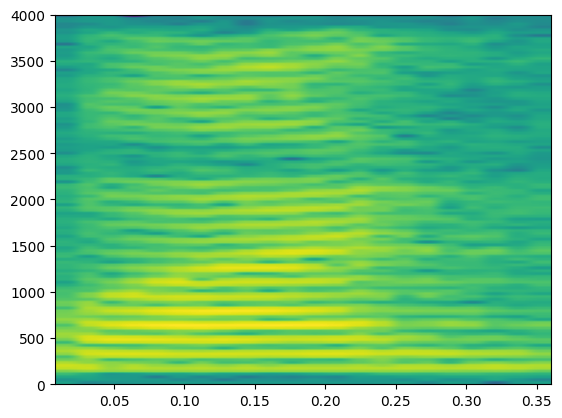

In [9]:
plt.specgram(data_1, Fs=rate_1)

In [10]:
def getSoundData(sf):
    data = sf.readframes(-1)
    data = np.frombuffer(data, 'int16')
    rate = sf.getframerate()
    timescale = np.linspace(start=0,
                            stop=len(data)/rate,
                            num=len(data))
    return (timescale, data)

In [ ]:
# a python list to store our collection of sound file data
sound_files_datas = []
# use glob to import all the sounds from the sounds folder
# then loop over each sound and add the data to our list
for file in glob.glob('sounds/*.wav'):
    soundfile = wave.open(file, 'r')
    sound_files_datas.append(getSoundData(soundfile))

print(len(sound_files_datas))

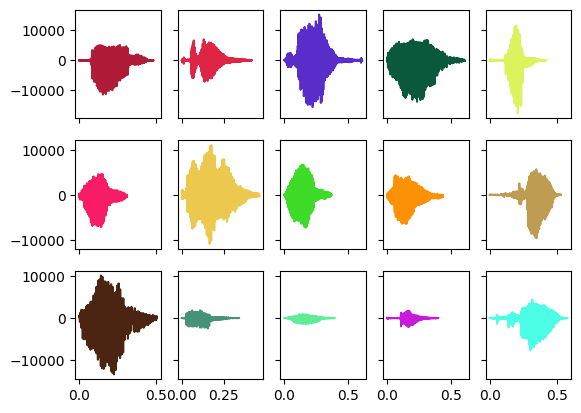

In [13]:
rows, cols = 3, 5
fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row')

rowCount = 0
colCount = 0

for sf_data in sound_files_datas:
    timescale, data = sf_data
    ax[rowCount, colCount].plot(timescale, data, c=(
        random.random(), random.random(), random.random()))
    if colCount < 4:
        colCount += 1
    else:
        rowCount += 1
        colCount = 0

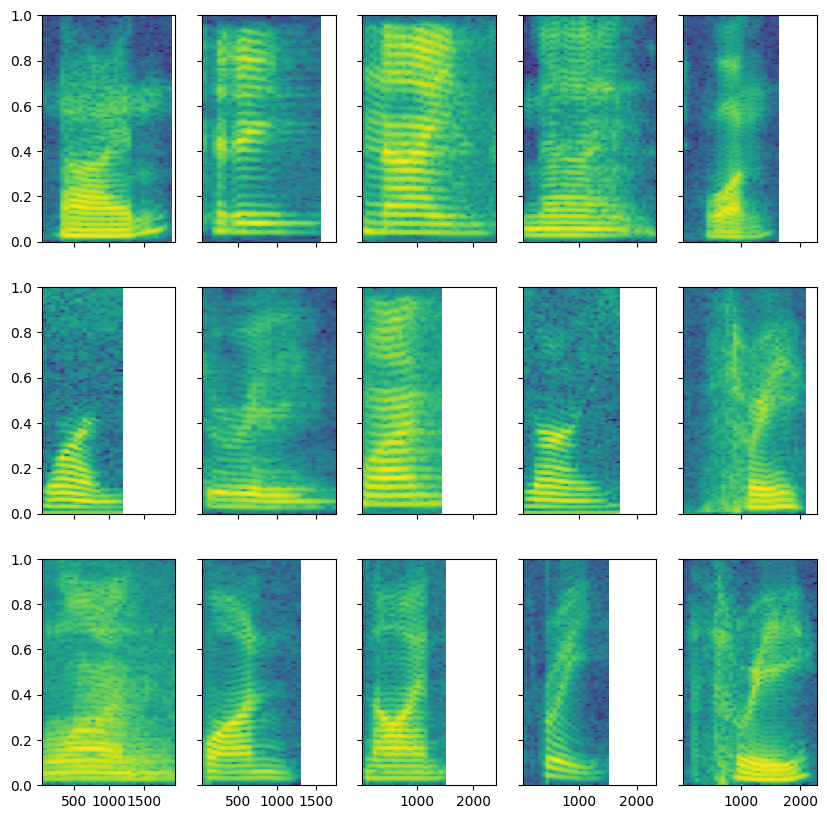

In [16]:
rows, cols = 3, 5
fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row')
fig.set_size_inches(10, 10)
rowCount = 0
colCount = 0

for sf_data in sound_files_datas:
    timescale, data = sf_data
    ax[rowCount, colCount].specgram(data, Fs = 2)

    if colCount < 4:
        colCount += 1
    else:
        rowCount += 1
        colCount = 0